In [418]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [419]:
train_df = pd.read_csv("train.csv")
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [420]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# EDA

<AxesSubplot:title={'center':'Missing Values'}>

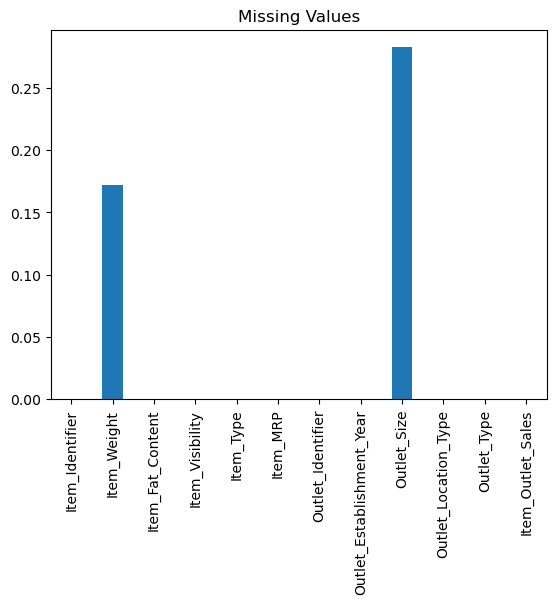

In [421]:
train_df.isna().mean().plot(kind='bar',title="Missing Values")

In [422]:
train_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:xlabel='Item_Identifier'>

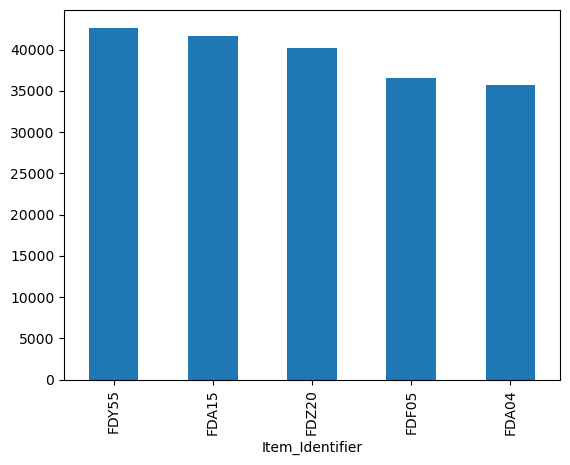

In [423]:
train_df.groupby("Item_Identifier")['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

In [424]:
train_df.select_dtypes(include=['object']).columns.drop('Item_Identifier')

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

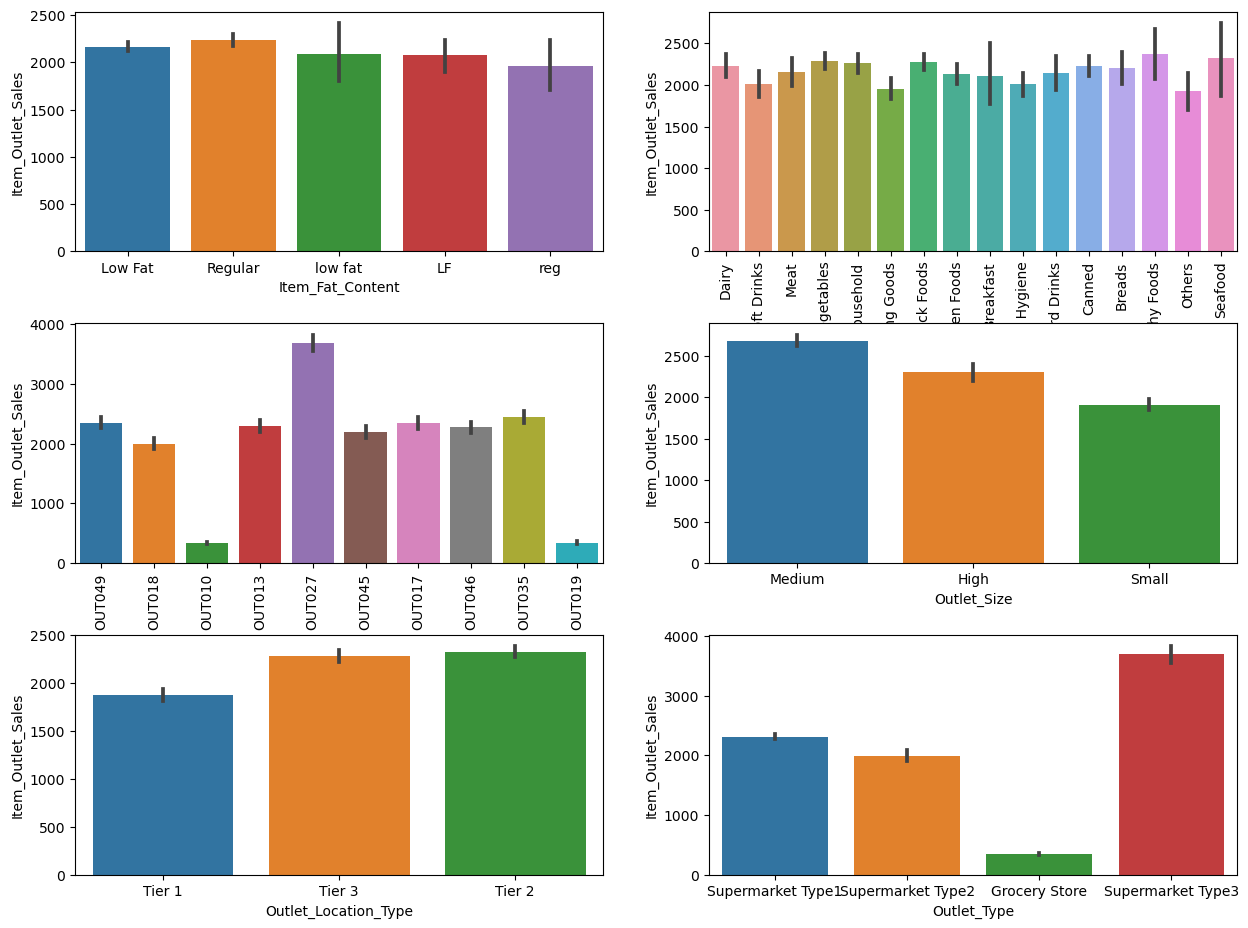

In [425]:
category_cols = train_df.select_dtypes(include=['object']).columns.drop('Item_Identifier')
count=1
plt.subplots(figsize=(15,80))
for column in category_cols:
    plt.subplot(20,2,count)
    plt.subplots_adjust(hspace = 0.3)
    sns.barplot(x=train_df[column], y=train_df["Item_Outlet_Sales"])
    if(train_df[column].nunique() > 7):
        plt.xticks(rotation=90);
    count+=1
plt.show()

<AxesSubplot:>

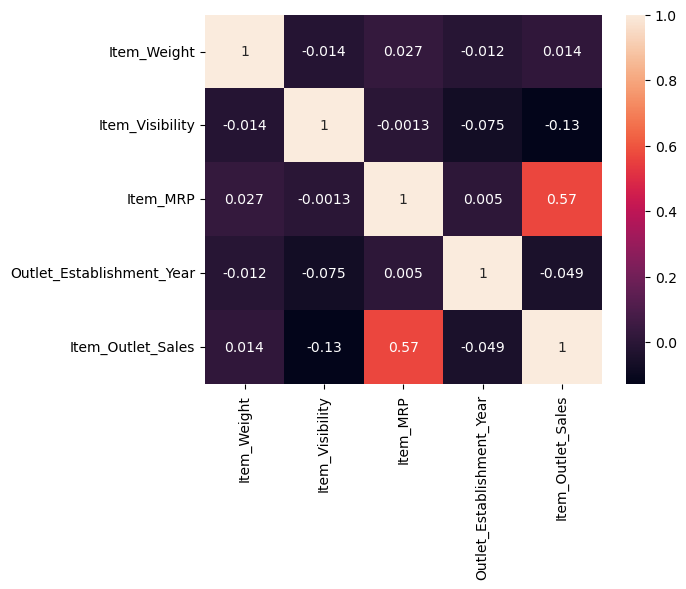

In [426]:
sns.heatmap(train_df.corr(),annot=True)

In [427]:
print(train_df.shape)
train_df.isna().sum()

(8523, 12)


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Preprocessing

## Check unique Values

In [428]:
print(train_df.shape)
for column in train_df.select_dtypes(include=['object']).columns:
    print('*'*len(column),column,'*'*len(column),sep="\n")
    print(train_df[column].value_counts())
    print('Unique values: ', train_df[column].nunique())

(8523, 12)
***************
Item_Identifier
***************
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Unique values:  1559
****************
Item_Fat_Content
****************
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Unique values:  5
*********
Item_Type
*********
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Unique value

In [429]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Check missing values

In [430]:
train_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [431]:
avg_weight

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1554,NCZ30,6.590
1555,NCZ41,19.850
1556,NCZ42,10.500
1557,NCZ53,9.600


In [432]:
avg_weight[avg_weight['Item_Identifier'] == 'FDP10']

array([19.])

In [433]:
train_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

## Preprocessing Steps

1. Replace Item_Weight missing value with avg_weight of same item using item_identifier
2. Item_Fat_Content - Correct misspelled - "LF", "low fat" to "Low Fat" & "reg" to Regular


In [434]:
def preprocessing(df):
    # Fill Item_Weight
    empty_weight = df['Item_Weight'].isna()
    avg_weight = df.groupby(["Item_Identifier"]).mean().reset_index()[['Item_Identifier', 'Item_Weight']]
    df.loc[empty_weight, 'Item_Weight'] = df.loc[empty_weight, 'Item_Weight'].apply(lambda x: avg_weight[avg_weight['Item_Identifier'] == x])
    df['Item_Weight'] = pd.to_numeric(df['Item_Weight'])
    # Item_Fat_Content - correct misspelled
    train_df.loc[(train_df['Item_Fat_Content'] == 'low fat') | (train_df['Item_Fat_Content'] == 'LF'), 'Item_Fat_Content'] = "Low Fat"
    train_df.loc[train_df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'

In [435]:
preprocessing(train_df)

In [436]:
print(train_df['Item_Weight'].isna().sum())
print(train_df['Item_Fat_Content'].value_counts())

1463
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [437]:
features = train_df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type', 
                     'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']]
target = train_df['Item_Outlet_Sales']

In [438]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 599.4+ KB


In [439]:
features.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1


# Pipeline

In [440]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('stdscalar', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehotenc', OneHotEncoder(handle_unknown='ignore'))
])

In [441]:
print(features.select_dtypes(include=np.number).columns.values)
print(features.select_dtypes(include='object').columns.values)

['Item_Weight' 'Item_Visibility' 'Item_MRP' 'Outlet_Establishment_Year']
['Item_Fat_Content' 'Item_Type' 'Outlet_Size' 'Outlet_Location_Type'
 'Outlet_Type']


In [442]:
numeric_columns = features.select_dtypes(include=np.number).columns.values
categorical_columns = features.select_dtypes(include='object').columns.values
preprocessor = ColumnTransformer(transformers=[
    ('numeric_processing', numeric_transformer, numeric_columns),
    ('categorical_processing',  categorical_transformer, categorical_columns)
], remainder='drop')

In [443]:
features

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2


In [444]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor())
])

model_perf = []
grid_param = {
    "regressor__n_estimators" : [10, 20, 30],
    "regressor__max_depth" : [None, 6, 8, 10],
    "regressor__max_leaf_nodes": [None, 5, 10, 20]
}
grid = GridSearchCV(estimator=pipeline,param_grid=grid_param,cv=5,verbose=1, n_jobs=-1)
grid.fit(features, target)

model_perf.append(
            {
                'regressor': grid.best_estimator_,
                'best score': grid.best_score_,
                'best params': grid.best_params_,
                'cv': grid.cv
            }
        )

In [445]:
scaled_features = preprocessor.fit_transform(features)

In [451]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_features,target,test_size=0.2,random_state=42)

In [452]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [453]:
random_forest.score(X_train, y_train)

0.9376001066832584

In [404]:
X_test

<1705x32 sparse matrix of type '<class 'numpy.float64'>'
	with 15345 stored elements in Compressed Sparse Row format>

In [454]:
y_pred = random_forest.predict(X_test)

In [455]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5604933539970987

In [456]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

In [457]:
r2_scores=[]
kf=KFold(n_splits=10, shuffle=True)
X = scaled_features
y = target
for train_index, test_index in kf.split(X,np.ravel(y)):
    Xf_train,Xf_test=X[train_index], X[test_index]
    yf_train,yf_test=y[train_index], y[test_index]
    print("X1_train : ", len(Xf_train), " X1_test : ", len(Xf_test), " y1_train : ", len(yf_train)," y1_test : ", len(yf_test))
    random_forest.fit(Xf_train,yf_train.ravel())
    prediction=random_forest.predict(Xf_test)
    score=r2_score(prediction,yf_test)
    r2_scores.append(score)

print("r2_scores : ", r2_scores)
print("Avg. r2_scores : ", np.mean(r2_scores))    

r2_scores :  [0.27550943690119545, 0.2620216448891862, 0.36402842553595316, 0.3011244251910504, 0.3454268866565091, 0.3524903694096162, 0.29208951432414954, 0.3589330400045013, 0.34196380493611744, 0.37021347807242844]
Avg. r2_scores :  0.32638010259207073
